In [1]:
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


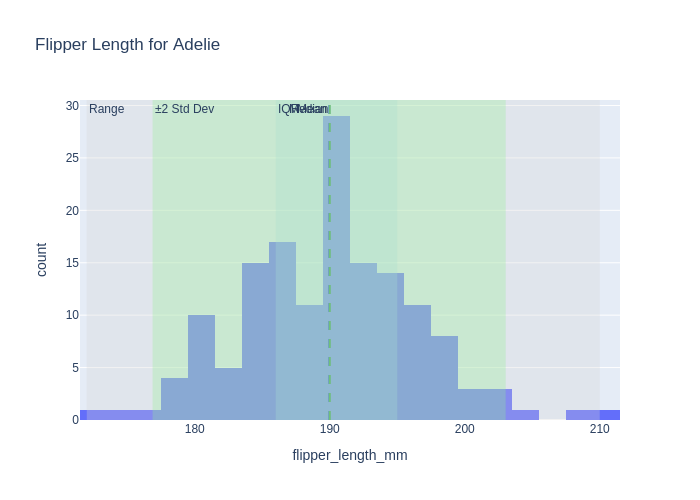

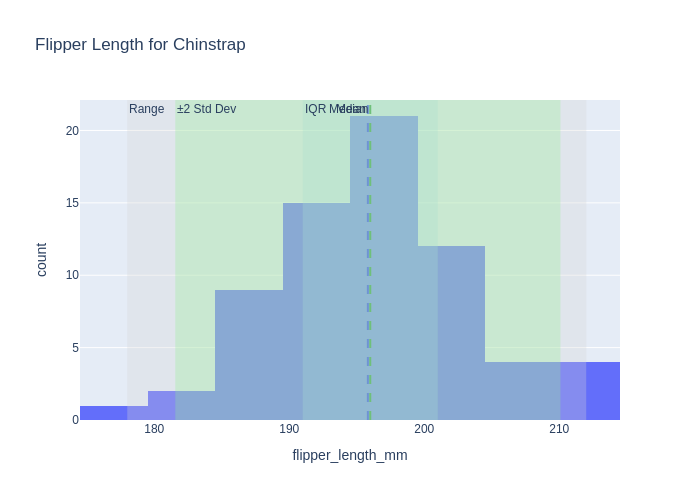

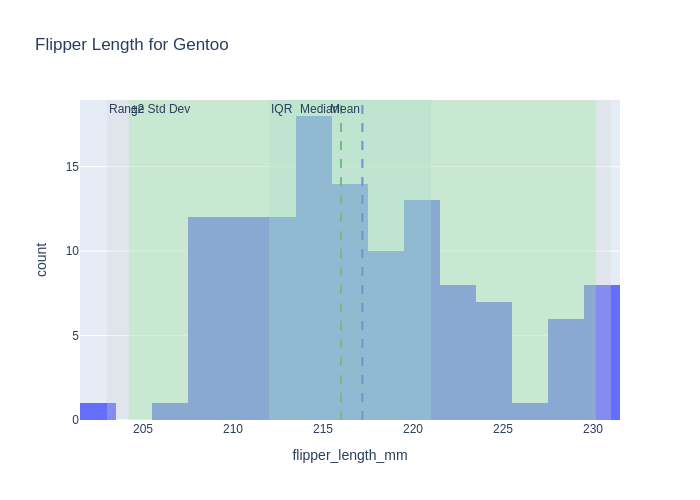

In [43]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Function to add lines and rectangles to the plot
def add_annotations(fig, species_data, species_name):
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    std = species_data['flipper_length_mm'].std()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    min_val = species_data['flipper_length_mm'].min()
    max_val = species_data['flipper_length_mm'].max()

    # Add mean and median lines
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text='Mean', annotation_position='top left')
    fig.add_vline(x=median, line=dict(color='green', dash='dash'), annotation_text='Median', annotation_position='top left')

    # Add range rectangle
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor='lightgrey', opacity=0.3, line_width=0, annotation_text='Range', annotation_position='top left')

    # Add IQR rectangle
    fig.add_vrect(x0=q1, x1=q3, fillcolor='lightblue', opacity=0.3, line_width=0, annotation_text='IQR', annotation_position='top left')

    # Add 2 standard deviations rectangle
    fig.add_vrect(x0=mean-2*std, x1=mean+2*std, fillcolor='lightgreen', opacity=0.3, line_width=0, annotation_text='±2 Std Dev', annotation_position='top left')

# Create histograms for each species
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]
    fig = px.histogram(species_data, x='flipper_length_mm', title=f'Flipper Length for {species}')
    add_annotations(fig, species_data, species)
    fig.show(renderer= "png")


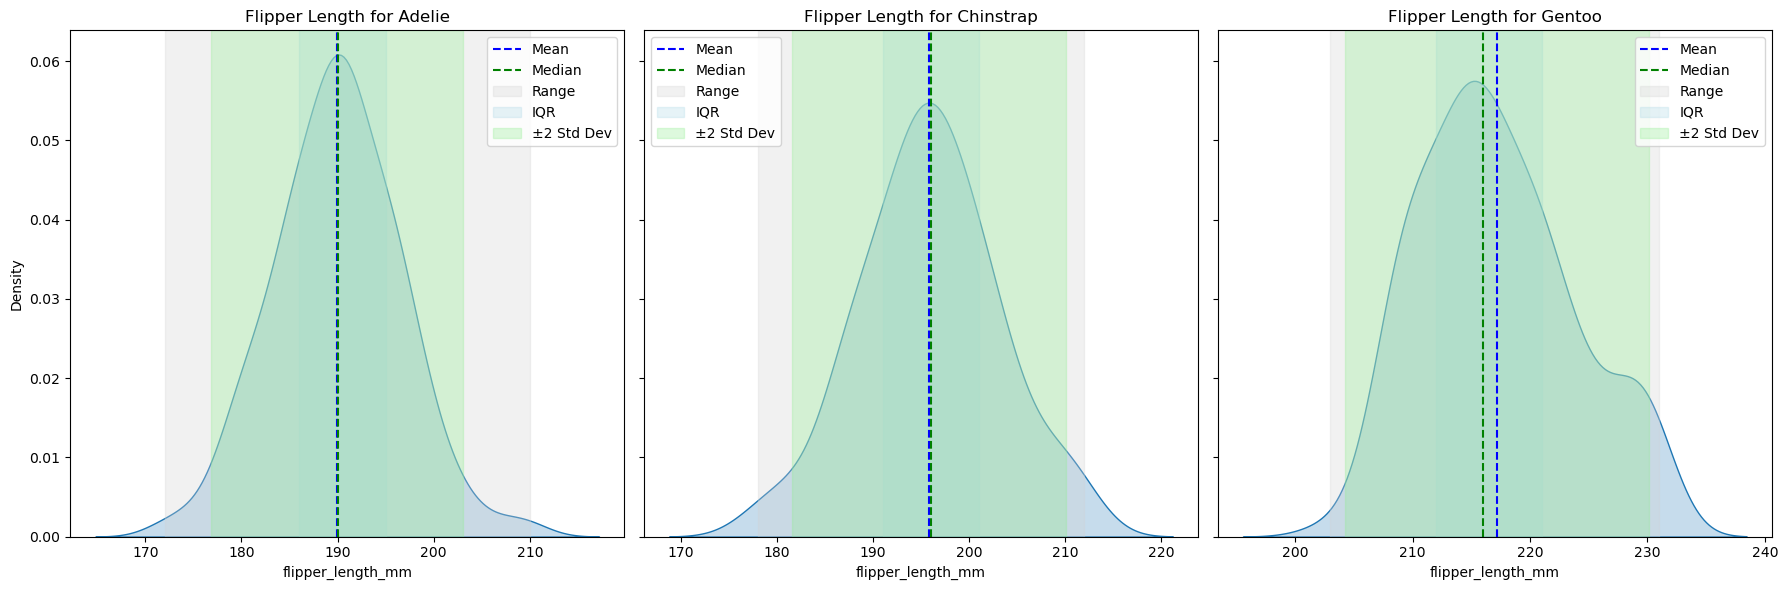

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Function to add lines and rectangles to the plot
def add_annotations(ax, species_data):
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    std = species_data['flipper_length_mm'].std()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    min_val = species_data['flipper_length_mm'].min()
    max_val = species_data['flipper_length_mm'].max()

    # Add mean and median lines
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle='--', label='Median')

    # Add range rectangle
    ax.axvspan(min_val, max_val, color='lightgrey', alpha=0.3, label='Range')

    # Add IQR rectangle
    ax.axvspan(q1, q3, color='lightblue', alpha=0.3, label='IQR')

    # Add 2 standard deviations rectangle
    ax.axvspan(mean-2*std, mean+2*std, color='lightgreen', alpha=0.3, label='±2 Std Dev')

# Create KDE plots for each species
species_list = penguins['species'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, species in zip(axes, species_list):
    species_data = penguins[penguins['species'] == species]
    sns.kdeplot(species_data['flipper_length_mm'], ax=ax, fill=True)
    add_annotations(ax, species_data)
    ax.set_title(f'Flipper Length for {species}')
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
Question 3 ;
- I prefer all the three different plots that is the box plot, histogram and KDE. My choice of which plot to use will
actually depend on what I am looking to see, find or analyze in a dataset. If I am interested in knowing the mean, median, 
minimum and maximum values, I will choose a box plot. If I want to know how data is specifically distributed, I will choose 
a histogram. Whereas a KDE will provide me with a better evaluation of how much the data changes as we move and also let me
know more explicitly the mode(s) in the data.

In [ ]:
Sure, here's a summary of our interactions:

1. **Plotly Histograms with Annotations**:
   - You asked for help in using Plotly to create histograms of `flipper_length_mm` for each species in the penguins dataset.
   - I provided a code snippet that uses `fig.add_vline()` and `fig.add_vrect()` to mark the mean, median, range, interquartile range (IQR), and a range defined by two standard deviations from the mean.

2. **Seaborn KDE Plots**:
   - You then requested to use Seaborn to create Kernel Density Estimation (KDE) plots with similar annotations, organized in a row of three plots.
   - I provided a code snippet that uses Seaborn to create KDE plots for each species, adding lines and rectangles to mark the mean, median, range, IQR, and the range defined by two standard deviations from the mean.

3. **Discussion on Plot Types**:
   - You shared your thoughts on the differences between boxplots, histograms, and KDE plots, noting that boxplots are better for displaying summary statistics, histograms for showing data distribution, and KDEs as a smoother version of histograms.
   - I agreed with your observations and provided a detailed comparison of the pros and cons of each plot type, highlighting their strengths and limitations.

Feel free to let me know if you need any more details or further assistance!

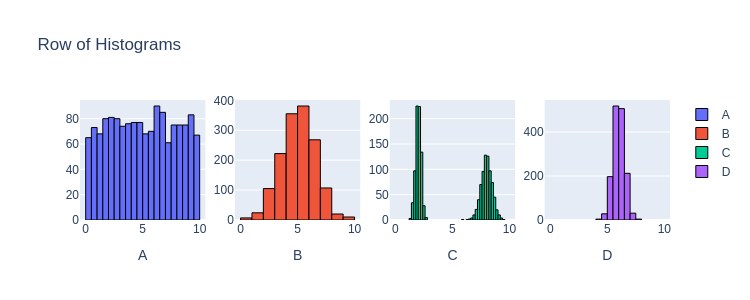

In [8]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer= "png") 

In [ ]:
1. Which datasets have similar means and similar variances :
    - A and B
2. Which datasets have similar means but quite different variances :
    - None
3. Which datasets have similar variances but quite different means :
    - C and D
4. Which datasets have quite different means and quite different variances :
    - A and B are different from C and D

In [ ]:
Question 5 :
- The mean and the median are two measurements of frequency in a data. When the data is symmetrical, the mean and median
are the same. However when there is skewness, which is caused either by an improper collection of data or due to outliers 
(few values that extend away), the mean and median are no longer equal to each Other. Right skewness means the mean is 
greater than the median whereas left skewness means the mean is less than median. All this is cuased by the fact that 
the mean is very sensitive to outliers.

In [9]:
# to import libraries
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

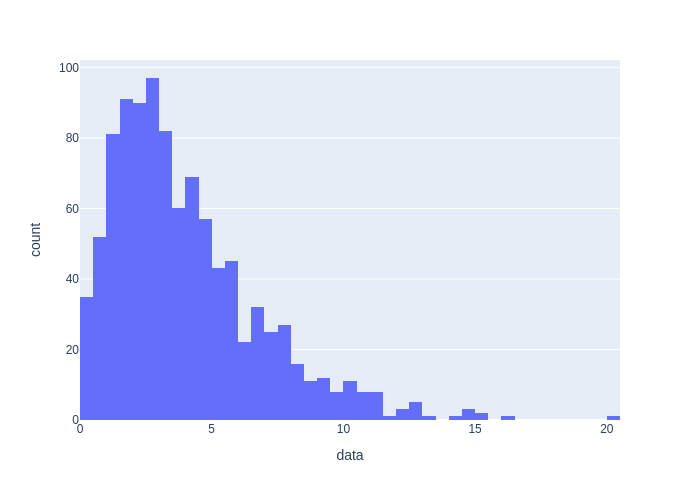

In [10]:
#Generate Sample 1 and Plot its histogram
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.show(renderer="png")  # USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [11]:
#Calculate the mean and median of Sample 1
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, [0.5])[0]  # median

mean_sample1, median_sample1

(4.025081327603134, 3.351322338166577)

In [12]:
#Generate Sample 2
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

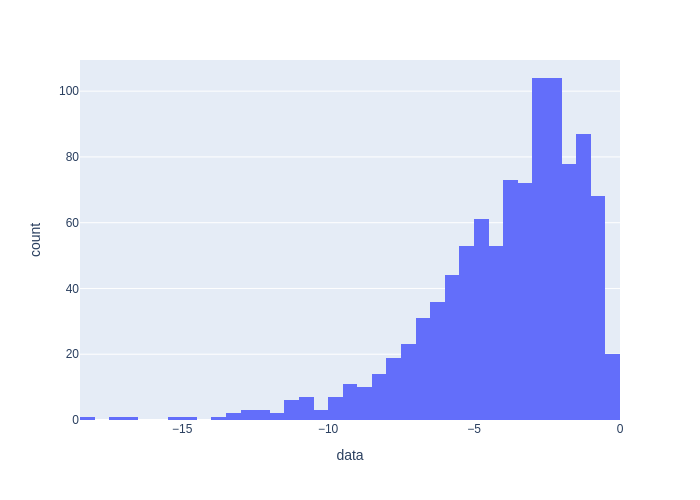

In [13]:
#Plot Histogram for Sample 2
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")  # USE `fig2.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [14]:
#Calculate mean and median of Sample 2
mean_sample2 = sample2.mean()
median_sample2 = np.quantile(sample2, [0.5])[0]  # median

mean_sample2, median_sample2

(-3.8924891116108364, -3.267452071900344)

In [ ]:
Sure, here's a summary of our conversation:

1. **Mean and Median**:
   - **Mean**: The arithmetic average of a set of numbers, sensitive to outliers.
   - **Median**: The middle value in a data set, less affected by outliers.
   - **Relationship**: In a symmetrical distribution, the mean and median are equal. In a skewed distribution, they differ (mean > median in right-skewed, mean < median in left-skewed).

2. **Code Explanation**:
   - **Imports**: `scipy.stats`, `pandas`, and `numpy`.
   - **Sample Generation**: Created a sample from a gamma distribution (`sample1`) and its negative counterpart (`sample2`).
   - **Histogram**: Created a histogram for `sample1`.
   - **Mean and Median Calculation**: Calculated the mean and median of `sample1`.

3. **Skewness**:
   - **Right Skewness**: Caused by lower boundaries, outliers, and growth processes. Mean > Median.
   - **Left Skewness**: Caused by upper boundaries, outliers, and decay processes. Mean < Median.

4. **Causes of Skewness**:
   - **Natural Limits**: Data cannot go below or above certain values.
   - **Data Collection Methods**: Biases in data collection.
   - **Start-up Effects**: Initial conditions or early stages of a process.

If you need any more details or further clarification, feel free to ask! Good luck with your homework assignment! 📚😊

In [ ]:
Sure, here's a summary of our interactions:

1. **Initial Request**: You asked for help extending a piece of code through a sequence of notebook cells.
2. **Code Extension**: I provided a detailed breakdown of your code into six notebook cells:
   - **Cell 1**: Import necessary libraries.
   - **Cell 2**: Generate `sample1` from a gamma distribution and plot its histogram.
   - **Cell 3**: Calculate the mean and median of `sample1`.
   - **Cell 4**: Generate `sample2` from a negative gamma distribution.
   - **Cell 5**: Plot the histogram for `sample2`.
   - **Cell 6**: Calculate the mean and median of `sample2`.

3. **Summary Request**: You asked for a summary of our exchanges for your homework assignment.

Feel free to let me know if you need any more details or further assistance!

In [15]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [16]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

       restaurant id  category id    item id  serving size (oz)     calories  \
count     750.000000   750.000000  750.00000         395.000000   750.000000   
mean     2126.666667   113.685333  374.50000          10.612996   296.149333   
std       897.234043     9.956229  216.65064           7.286159   209.034366   
min      1000.000000   100.000000    0.00000           0.035274     0.000000   
25%      1000.000000   106.000000  187.25000           5.200000   150.000000   
50%      2000.000000   111.000000  374.50000          10.158912   260.000000   
75%      3000.000000   123.000000  561.75000          16.000000   410.000000   
max      3000.000000   130.000000  749.00000          32.000000  1880.000000   

       calories from fat  total fat (% daily value)  saturated fat (g)  \
count         260.000000                 260.000000         637.000000   
mean          127.096154                  21.815385           3.409105   
std           127.875914                  21.885199      

Index(['restaurant id', 'category id', 'item id', 'serving size (oz)',
       'calories', 'calories from fat', 'total fat (g)',
       'total fat (% daily value)', 'saturated fat (g)',
       'saturated fat (% daily value)', 'trans fat (g)', 'cholesterol (mg)',
       'cholesterol (% daily value)', 'sodium (mg)', 'sodium (% daily value)',
       'carbohydrates (g)', 'carbohydrates (% daily value)',
       'dietary fiber (g)', 'dietary fiber (% daily value)', 'sugars (g)',
       'protein (g)', 'vitamin a (% daily value)', 'vitamin c (% daily value)',
       'calcium (% daily value)', 'iron (% daily value)'],
      dtype='object')


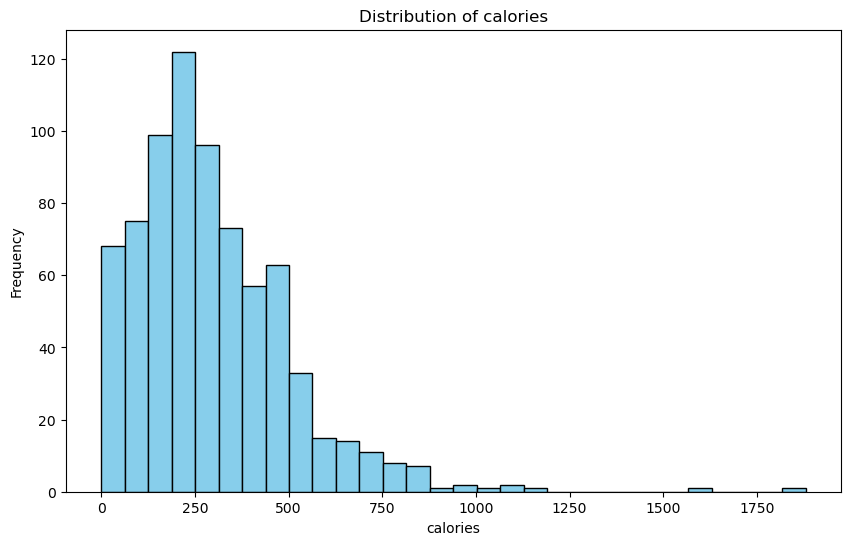

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Display the column names
print(df.columns)

# Assuming the correct column name is 'Calories (kcal)', let's plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['calories'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of calories')
plt.xlabel('calories')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#I could not provide a summary for the above chart because I attained the limited 

In [50]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

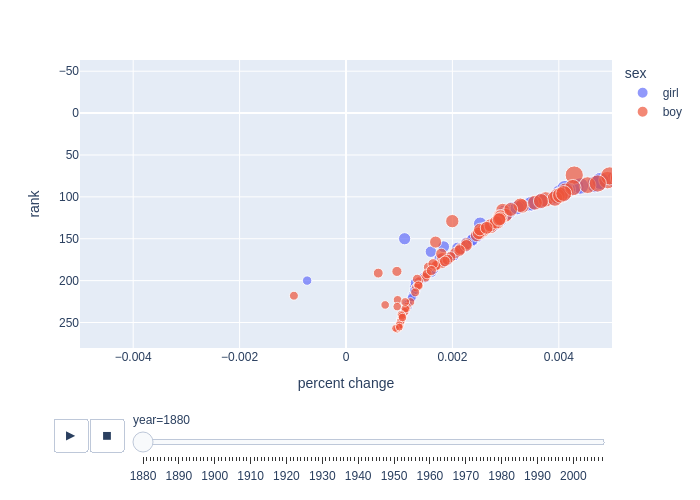

In [28]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png")

In [ ]:
Question 9 :
- No